# Сборный проект

# Исследование данных о продажах игр интернет-магазина «Стримчик»

# Цель исследования:
Необходимо выявить определяющие успешность игры закономерности. Отработать принцип работы с данными, для того чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

# Описание данных:

•	Name — название игры\
•	Platform — платформа\
•	Year_of_Release — год выпуска\
•	Genre — жанр игры\
•	NA_sales — продажи в Северной Америке (миллионы проданных копий)\
•	EU_sales — продажи в Европе (миллионы проданных копий)\
•	JP_sales — продажи в Японии (миллионы проданных копий)\
•	Other_sales — продажи в других странах (миллионы проданных копий)\
•	Critic_Score — оценка критиков (максимум 100)\
•	User_Score — оценка пользователей (максимум 10)\
•	Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

# План работы:
Шаг 1. Загрузка данных\
Откроем файл и изучим информацию\

Шаг 2. Подготовка данных\
•	Приведем названия столбцов к нижнему регистру\
•	Преобразуем данные в нужные типы и укажем причины преобразований\ 
•	Обработаем пропуски, выявим причины их возникновения\
•	Создадим отдельный столбец с суммарными продажами во всех регионах.

Шаг 3. Исследовательский анализ данных\
•	Посмотрим, сколько игр выпускалось в разные годы. Определим тот период, за каоторый данные наиболее важны.\
•	Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и постройте распределение по годам.Определим срок, за который появляются новые и исчезают старые платформы.\
•	Выберем данные за актуальный период, которые помогут построить прогноз на 2017 год.\
•	Определим платформы лидирующие по продажам. Выберем несколько потенциально прибыльных платформ.\
•	Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. \
•	Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Соотнесем полученные данные с другими платформами.\
•	Посмотрим на общее распределение игр по жанрам. 

Шаг 4. Портрет пользователя каждого региона\
Определим для пользователя каждого региона (NA, EU, JP):\
•	Самые популярные платформы (топ-5).\
•	Самые популярные жанры (топ-5).\
•	Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Шаг 5. Проверка гипотез\
•	Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;\
•	Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Шаг 6. Итоговые выводы

## Шаг. Загрузка данных

Откроем файл с данными и изучим общую информацию о датасете.

In [1]:
#Импотрируем все необходимые для работы бибилиотеки:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
import numpy as np

In [2]:
#Загружаем данные:
data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [3]:
data.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
#Рассмотрим типы данных и проверим наличие пропусков  в загруженном датафрейме:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [6]:
#Поиск пропущенных значений:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [7]:
#Поиск явных дубликатов
data.duplicated().sum()
#Не найдено

0

### Выводы "Шаг 1"
Были импортированы необходимые в дальнейшей работе библиотеки, а таже произведена загрузка данных.\
Мы проверили корректность вывода информации в таблице и изучили типы исходных данных.\
Нами был обнаружен некорректно указанный тип данных в столбце 'user_score' и 'year_of_release'.\
В дальнейшем, необходимо изменить тип object на float64.\
В таблице data мы обнаружили пропуски данных в столбцах: 'name', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating'. Дубликатов нет.

## Шаг . Подготовка данных

### Названия столбцов

In [8]:
#Приведем к нижнему регистру названия столбцов:
data.columns = data.columns.str.lower()

###### Посмотрим на результат:
data.head(5)

Теперь названия столбцов соответствуют правилам хорошего стиля.

In [9]:
#Приведем названия столбца 'name' к нижнему регистру, для поиска неявных дубликатов
data['name'] = data['name'].str.lower()
data['platform'] = data['platform'].str.lower()
data['genre'] = data['genre'].str.lower()

In [10]:
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [11]:
data.duplicated(subset = ['name', 'platform', 'year_of_release']).sum()

2

In [12]:
#Посмотрим на дубликаты:
data[data.duplicated(['name', 'platform', 'year_of_release'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14244,NaN,gen,1993.0,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NaN
16230,madden nfl 13,ps3,2012.0,sports,0.0,0.01,0.00,0.0,83.0,5.5,E


In [13]:
#удалили дубликаты
data.drop_duplicates (subset=['name', 'platform', 'year_of_release'], inplace=True)

In [14]:
#удаление прошло успешно
data.duplicated(subset = ['name', 'platform', 'year_of_release']).sum()

0

### Типы данных. 

•	Замените названия столбцов (приведите к нижнему регистру);\
•	Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;\
•	Обработайте пропуски при необходимости: \
o	Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;\
o	Опишите причины, которые могли привести к пропускам;\
o	Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;\
•	Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.


In [15]:
#еще раз посмотрим на типы данных:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16712 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       10013 non-null  object 
 10  rating           9948 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Выполним преобразования типов в стобцах:

year_of_release 

user_score       

В столбце data['user_score'] помимо числовых данных нами были обнаружены значения 'tbd'./
tbd - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. 
Для того, чтобы изменить тип данных этого столбца, нам необходимо заменить "tbd" на "NaN".

Заменили тип данных на числовой для того, чтобы проводить математические операции с чисиловыми значениями данного столбца.

In [16]:
#Замена tbd на NaN:
data['user_score'] = data['user_score'].replace('tbd', np.nan)

In [17]:
#Преобразуем тип данных data['user_score'] object -> float
data['user_score'] = data['user_score'].astype(float)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16712 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       7589 non-null   float64
 10  rating           9948 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


In [19]:
#Проверяем
data['user_score'].dtype

dtype('float64')

In [20]:
##Преобразуем тип данных data['year_of_release'] object -> float
data['year_of_release'] = data['year_of_release'].astype(float)

In [21]:
#Проверяем
data['year_of_release'].dtype

dtype('float64')

### Пропуски

o	Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;\
o	Опишите причины, которые могли привести к пропускам;\
o	Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;

In [22]:
#посмотрим на пропуски в данных:
data.isna().sum()

name                  1
platform              0
year_of_release     269
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         9124
rating             6765
dtype: int64

Что делаем с пропусками?

Пропуски не трогаем, не можем заменить. Почему?

year_of_release - одна и та же игра могла выйти на разных платформах в разное время. Соответственно, год релиза тоже будет разным. То есть, мы не можем подставить года релиза игры из данных о той же игре, вышедшей на другой платформе.

critic_score - Оценка игр критиками может отличаться, в зависимости от того, на какой платформе она вышла.

user_score - Оценка игр игроками может отличаться, в зависимости от того, на какой платформе она вышла.


In [23]:
data[data['name'].isnull() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.0,0.08,NaN,NaN,NaN


In [24]:
data[data['genre'].isnull() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.0,0.08,NaN,NaN,NaN


In [25]:
#Можем удалить строки с пропусками в столбцах['name'] и ['genre'], т.к. они малочисленны. Можем ими пожертвовать.
data = data.dropna(subset = ['name', 'genre'])

Организация ESRB была основана в 1994 году, в то время как мы работаем с данными, которые начинаются с 1980 года.\
Пропуски в этом столбце говорят нам о том, что рейтинга, вероятно, нет у старых игр, которые выходили раньше срока основания организации.

In [26]:
pivot_ESRB = data.pivot_table(index=['year_of_release', 'rating'], values=['name'], aggfunc='count')

In [27]:

pd.set_option('display.max_rows', None)
pivot_ESRB

name
year_of_release rating      
1985.0          T          1
1988.0          E10+       1
1992.0          M          1
                T          1
1994.0          T          1
1996.0          E          1
                K-A        1
                M          3
                T          2
1997.0          E          6
                K-A        2
                M          2
                T          9
1998.0          E         13
                M          4
                T         15
1999.0          E         20
                M          5
                T         17
2000.0          E         83
                M         13
                T         52
2001.0          E        205
                M         27
                T        107
2002.0          E        362
                M         62
                T        231
2003.0          E        289
                E10+       3
                M         83
                T        238
2004.0          E        269
                E10+      10
                M        101
                T        218
2005.0          AO         1
                E        246
                E10+     102
                EC         2
                M        135
                T        220
2006.0          E        252
                E10+     133
                M         82
                T        211
2007.0          E        352
                E10+     164
                M         85
                T        220
2008.0          E        450
                E10+     183
                M         92
                T        256
2009.0          E        435
                E10+     194
                EC         1
                M        122
                T        259
2010.0          E        320
                E10+     147
                EC         4
                M         97
                T        231
2011.0          E        223
                E10+     150
                EC         1
                M        124
                RP         1
                T        204
2012.0          E         92
                E10+      54
                M        129
                T         79
2013.0          E         83
                E10+      67
                M        104
                T         62
2014.0          E         66
                E10+      84
                M        116
                T         79
2015.0          E         87
                E10+      51
                M         71
                T        106
2016.0          E         66
                E10+      50
                M         78
                T         86

Можем заметить, что до 1996 года в таблице там встречаются лишь единичные, редкие значения рейтинга. 
Это подтверждает теорию о том, что организация начала активно присваивать рейтинг играм лишь спустя 2 года с даты основания.

In [28]:
#Смотрим на уникальные значения столбца 'rating'
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [29]:
#Произведем замену nan -> unknown. Будем считать, если рейтинг отсутствует, значит он неизвестен, либо не определялся.
data['rating'] = data['rating'].fillna('unknown')

In [30]:
data['rating'].value_counts()

rating
unknown    6764
E          3989
T          2961
M          1563
E10+       1420
EC            8
K-A           3
RP            3
AO            1
Name: count, dtype: int64

Рейтинги категорий     

    EC            8
    K-A           3
    RP            3
    AO            1
Очень малочисленны. Однако, этот факт ни на что не влияет, эти данные не попадут в актуальный период, и соответственно, в выводы и графики.

Пропуски в вышеописанных столбцах могли возникуть по причине отсутствия, утери данных, технических и человеческих ошибок.

### Суммарные продажи во всех регионах 

In [31]:
#Посчитаем суммарные продажи во всех регионах.
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales','other_sales']].sum(axis = 1)

In [32]:
data['total_sales'].head(5)

0    82.54
1    40.24
2    35.52
3    32.77
4    31.38
Name: total_sales, dtype: float64

### Выводы "Шаг 2"
Привели названия столбцов к нижнему регистру

Преобразовали тип данных object -> float в столбцах 'user_score' и 'year_of_release'
В столбце 'user_score' преобразовали значения 'tbd' -> 'nan' -> 'unknown'
Оставили нетронутыми пропуски в столбцах 'year_of_release', 'critic_score', 'user_score' по причине отсутствия данных для корректной замены.\
Избавились от неявных дубликатов.


Причины возникновения пропусков в данных:

Невозможность их получения или обработки\
Искажение или сокрытие информации\
Всевозможные поломки технического оборудования\
Экономические причины\
Человеческий фактор

Создали столбец с суммарными продажами игры - 'total_sales'. 

In [33]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16712 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16712 non-null  object 
 4   na_sales         16712 non-null  float64
 5   eu_sales         16712 non-null  float64
 6   jp_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       7589 non-null   float64
 10  rating           16712 non-null  object 
 11  total_sales      16712 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.7+ MB


## Шаг . Исследовательский анализ данных

### Количество игр в разные годы

Посмотрим, сколько игр выпускалось в разные годы и ответим на вопрос: "Важны ли данные за все периоды?".

In [34]:
#Сводная таблица
games_in_year = data.pivot_table(index = 'year_of_release', values = 'name', aggfunc=['count'])

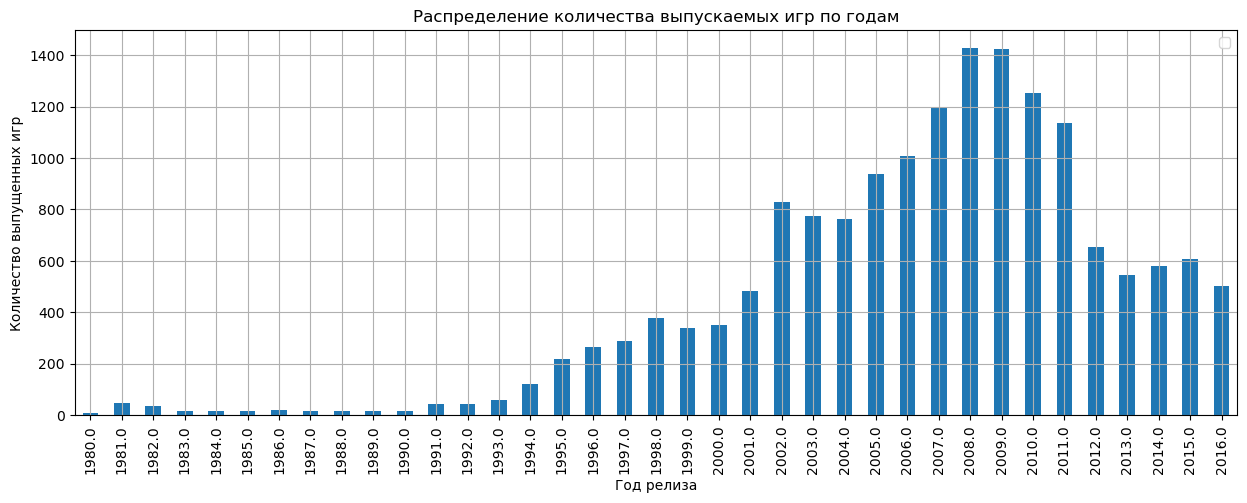

In [35]:
#Построим барплот по сводной таблице 'games_in_year'
games_in_year.plot(kind='bar', grid=True, figsize=(15, 5));
plt.xlabel('Год релиза')
plt.ylabel('Количество выпущенных игр')
plt.title('Распределение количества выпускаемых игр по годам')
plt.legend('');

In [36]:
games_in_year.describe()

,count
,name
count,37.000000
mean,444.405405
std,451.591535
min,9.000000
25%,36.000000
50%,338.000000
75%,762.000000
max,1427.000000


В разные годы выпускалось от 9 до 1427 млн игр. Мы замечаем интенсивный рост выпуска игр начиная с 1994 года, и падение после 2009 года.  Пик востребованности игровой индустрии пришелся на 2008 и 2009 годы.
Последние годы - с 2012 до 2016 года показатели продаж игр колеблются на уровне, который не сильно превышает значения за 2001 год.\
Для того, чтобы отработать принцип работы с данными и составить прогноз на будущее, нам вовсе не нужны данные за период с 1980 года.\
Компьютерные игры длительное время не были популярны. Их место, среди широкой публики, занимали игровые автоматы. В 1970 - 1980-х годах, появились доступные игровые консоли и домашние компьютеры, компьютерные игры начали становиться частью поп-культуры. Однако вплоть до 1995 года выпускалось ничтожно мало игр - менее 100 игр в год!

### Продажи по платформам

Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [37]:
sales_platform = data.pivot_table(index='platform', 
                                  values='total_sales', 
                                  aggfunc = np.sum).sort_values(by='total_sales', ascending=False)

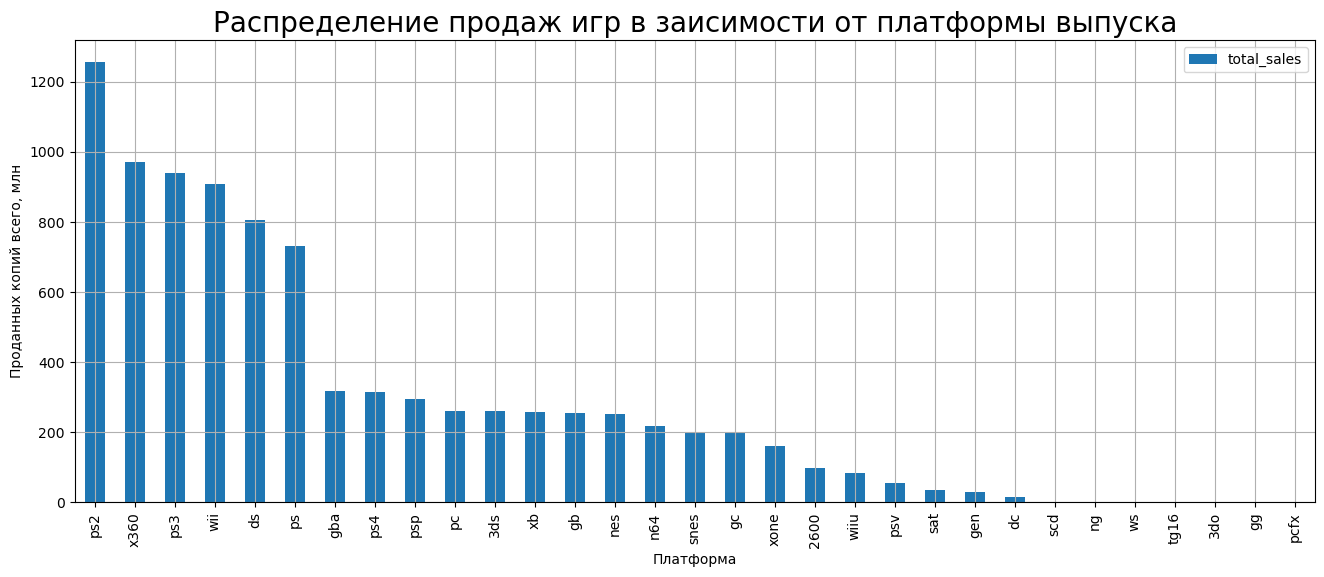

In [38]:
sales_platform.plot(kind='bar', grid=True, figsize=(16, 6));
plt.xlabel('Платформа')
plt.ylabel('Проданных копий всего, млн')
plt.title('Распределение продаж игр в заисимости от платформы выпуска', fontsize=20);

Платформы с наимольшими суммарными продажами:PS2, X360, PS3, Wii, DS, PS
Далее построим распределение по годам для этих платформ.

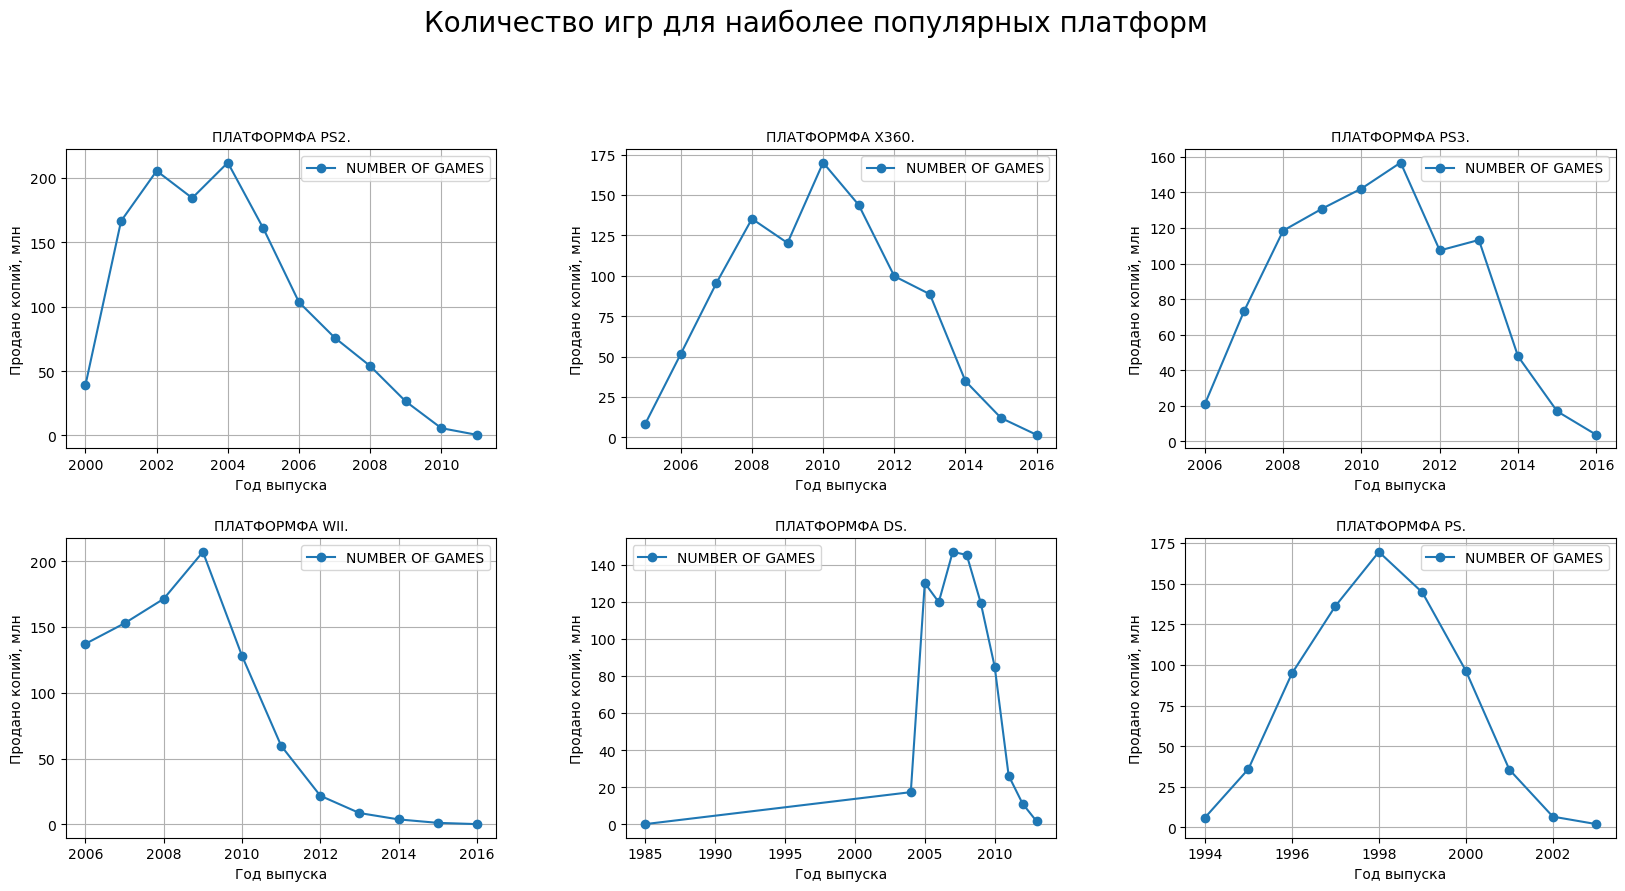

In [39]:
position = 0
top_sales = sales_platform.reset_index()['platform'].head(6)
plt.figure(figsize=[20, 14])
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.suptitle('Количество игр для наиболее популярных платформ', fontsize=20)
for name_of_platform in top_sales:
    position += 1
    pvt = data.query('platform == @name_of_platform').pivot_table(index='year_of_release', 
                                                                  values='total_sales', 
                                                                  aggfunc='sum')
    plt.subplot(3, 3, position)
    plt.title(f'ПЛАТФОРМФA {name_of_platform.upper()}.', fontsize=10)
    plt.plot(pvt, 'o-', label='NUMBER OF GAMES', alpha=1)
    plt.ylabel('Продано копий, млн')
    plt.xlabel('Год выпуска')
    plt.grid(True)
    plt.legend()
plt.show();

In [40]:
data.loc[data['platform'] == 'ds'].pivot_table(index='year_of_release', values='total_sales')

,total_sales
year_of_release,
1985.0,0.020000
2004.0,0.750870
2005.0,1.102881
2006.0,0.596070
2007.0,0.390798
2008.0,0.295346
2009.0,0.296625
2010.0,0.263220
2011.0,0.171111


Заметили необычный "выброс" у платформы ds - необычайно длительный период существования. Проверили. Это единичное значение. Релиз платформы датирован 2004 годом, значит мы нашли ошибку в данных, удаляем аномальное значение.

In [41]:
data.query('year_of_release == 1985') 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
374,kung fu,nes,1985.0,action,1.64,0.38,1.42,0.06,NaN,NaN,unknown,3.50
869,soccer,nes,1985.0,sports,0.18,0.23,1.53,0.02,NaN,NaN,unknown,1.96
1262,ice climber,nes,1985.0,platform,0.46,0.10,0.92,0.02,NaN,NaN,unknown,1.50
1482,gyromite,nes,1985.0,puzzle,0.73,0.16,0.40,0.03,NaN,NaN,unknown,1.32
1971,tag team match m.u.s.c.l.e.,nes,1985.0,fighting,0.00,0.00,1.05,0.00,NaN,NaN,unknown,1.05
2011,bomberman,nes,1985.0,puzzle,0.18,0.00,0.85,0.00,NaN,NaN,unknown,1.03
2062,1942,nes,1985.0,shooter,0.65,0.14,0.21,0.00,NaN,NaN,unknown,1.00
2252,balloon fight,nes,1985.0,platform,0.39,0.09,0.43,0.01,NaN,NaN,unknown,0.92
3904,wrecking crew,nes,1985.0,platform,0.00,0.00,0.51,0.00,NaN,NaN,unknown,0.51


In [42]:
data = data.drop (index= 15957)

In [43]:
data.loc[data['platform'] == 'ds'].pivot_table(index='year_of_release', values='total_sales')

,total_sales
year_of_release,
2004.0,0.750870
2005.0,1.102881
2006.0,0.596070
2007.0,0.390798
2008.0,0.295346
2009.0,0.296625
2010.0,0.263220
2011.0,0.171111
2012.0,0.478696


Рассмотрев графики, можем заметить, что популярность платформ от взлета до падения продаж копий, длится около 10 лет.
За 10 лет появляются новые и исчезают старые платформы. 
Остальные популярные платформы придерживаются одной и той же тенденции: Через 4-5 лет после релиза платформы  продажи игр для нее достигают пика, а затем, более медленно идут на спад.  

### Определение актуальных данных

Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Не учитывайте в работе данные за предыдущие годы.


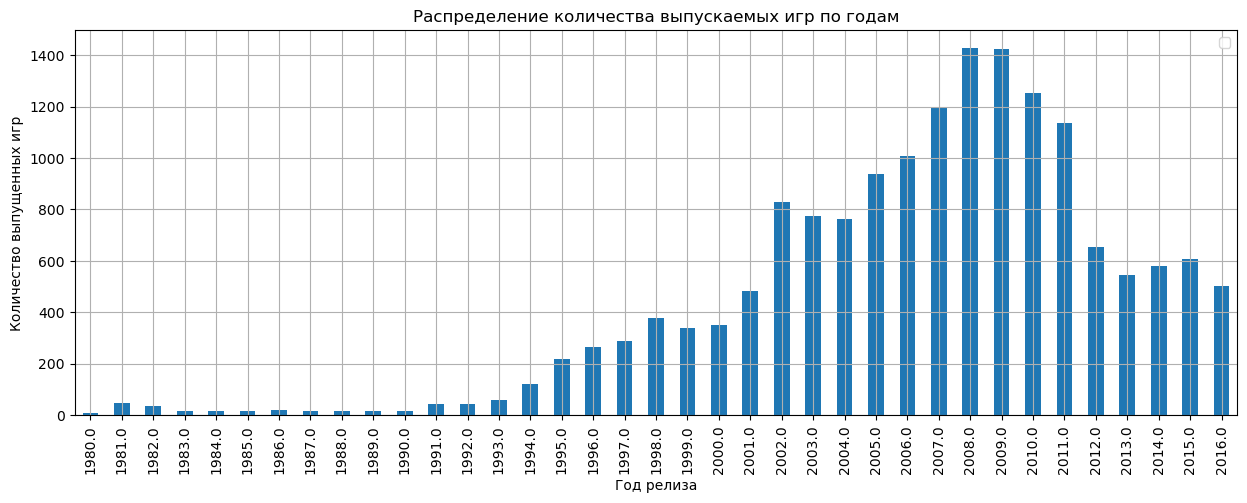

In [44]:
#Выведем на экран повторно график из пункта 3.1 для того, чтобы определить актуальный период
games_in_year.plot(kind='bar', grid=True, figsize=(15, 5));
plt.xlabel('Год релиза')
plt.ylabel('Количество выпущенных игр')
plt.title('Распределение количества выпускаемых игр по годам')
plt.legend('');

Будем считать наиболее приближенными к "прогнозируемым данным", судя по количеству выпущенных игр на графике из пункта 3.1 - данные за последние 5 лет.\
Брать для анализа данные, ранее 2012 года не будем. Стремительный рост выпуска игр, длившийся влоть до 2011 года может негативно сказаться на наших прогнозах.\
Соотвестсвенно, число выпускаемых игр после 2012 года "выходит на плато", колебания данных уже не столь значительны.

In [45]:
new_data=data.query('year_of_release>=2014')
#Подготовим данные для дальнейшей работы
#Срез данных с 2012 по 2016 год.

### Наиболее прибыльные платформы

Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [46]:
sales_new_data = new_data['total_sales'].value_counts()

Посмотрим на прибыль по платформам от продаж за 5 последних лет

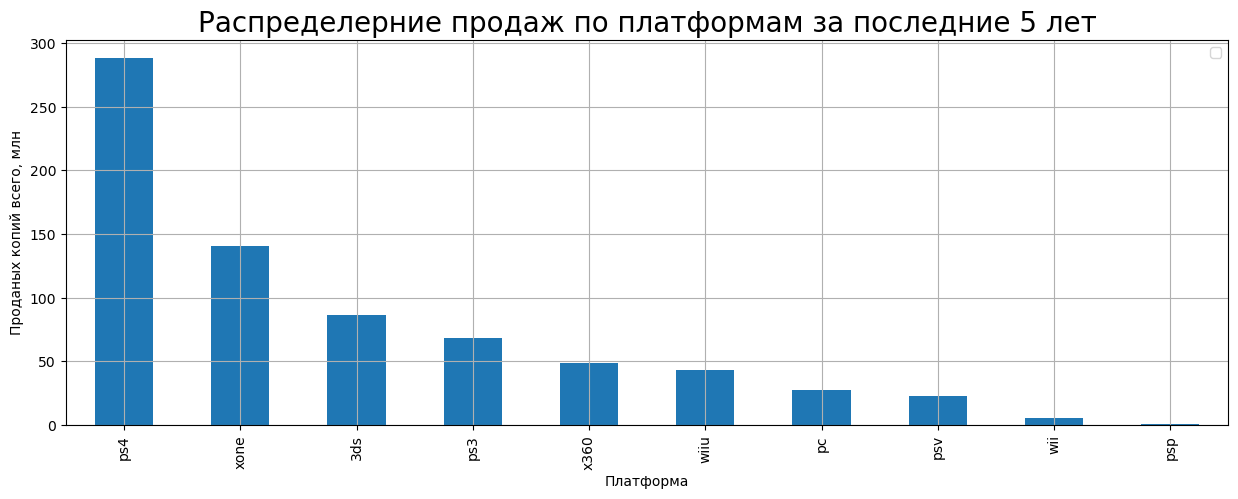

In [47]:
pt_new_data = new_data.pivot_table(index = 'platform', values = 'total_sales', aggfunc=['sum'])
pt_new_data.columns = ['sum']
pt_new_data = pt_new_data.sort_values('sum', ascending = False)
pt_new_data.plot(kind='bar', grid=True, figsize=(15, 5));
plt.xlabel('Платформа')
plt.ylabel('Проданых копий всего, млн')
plt.title('Распределерние продаж по платформам за последние 5 лет', fontsize=20);
plt.legend('');

Наиболее прибыльными за последние 5 лет платформами являются: PS4, XOne, 3DS. 

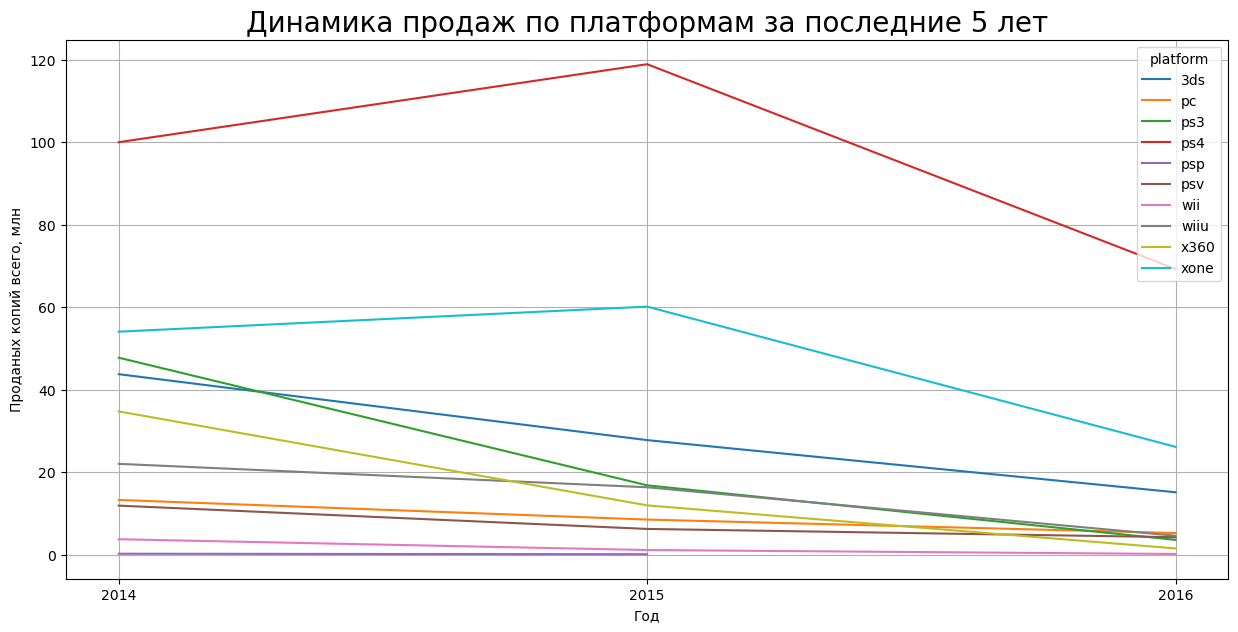

In [48]:
#Посмотрим на изменение продаж игр для разных платформ за последние 5 лет:
new_data.pivot_table(index='year_of_release', 
                 columns = 'platform', 
                 values='total_sales', 
                 aggfunc='sum').plot(grid=True, figsize=(15, 7))
plt.xlabel('Год')
plt.ylabel('Проданых копий всего, млн')
plt.title('Динамика продаж по платформам за последние 5 лет', fontsize=20);
plt.locator_params(axis='x', nbins=3)
plt.show()

Замечаем на графике резкое падение продаж игр для всех платформ в 2016 году. Это последний год, среди данных, предоставленных для анализа. Данные могли быть доступны не за весь год, выгрузка данных могла быть произведена в середине года. Это могло сказаться на полноте данных, и, соответственно, показателях продаж.
Наиболее потенциально прибыльными платформами можно считать "Новичков": PS4 и XOne, вышедших в 2013 году. Эти платформы еще не достигли пика своей популярности. На них стоит возлагать большие надежды.
Также, в перечень перстпективных платформ входят 3DS (не смотря на падение уровня продаж, в ближайшее время платформа останется актуальной) и pc (30-тилетняя история персональных компьютеров говорит, что продажи хоть и не такие большие, но стабильные и игры для pc все еще востребованы).

### 	Глобальная продажа игр по платформам

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

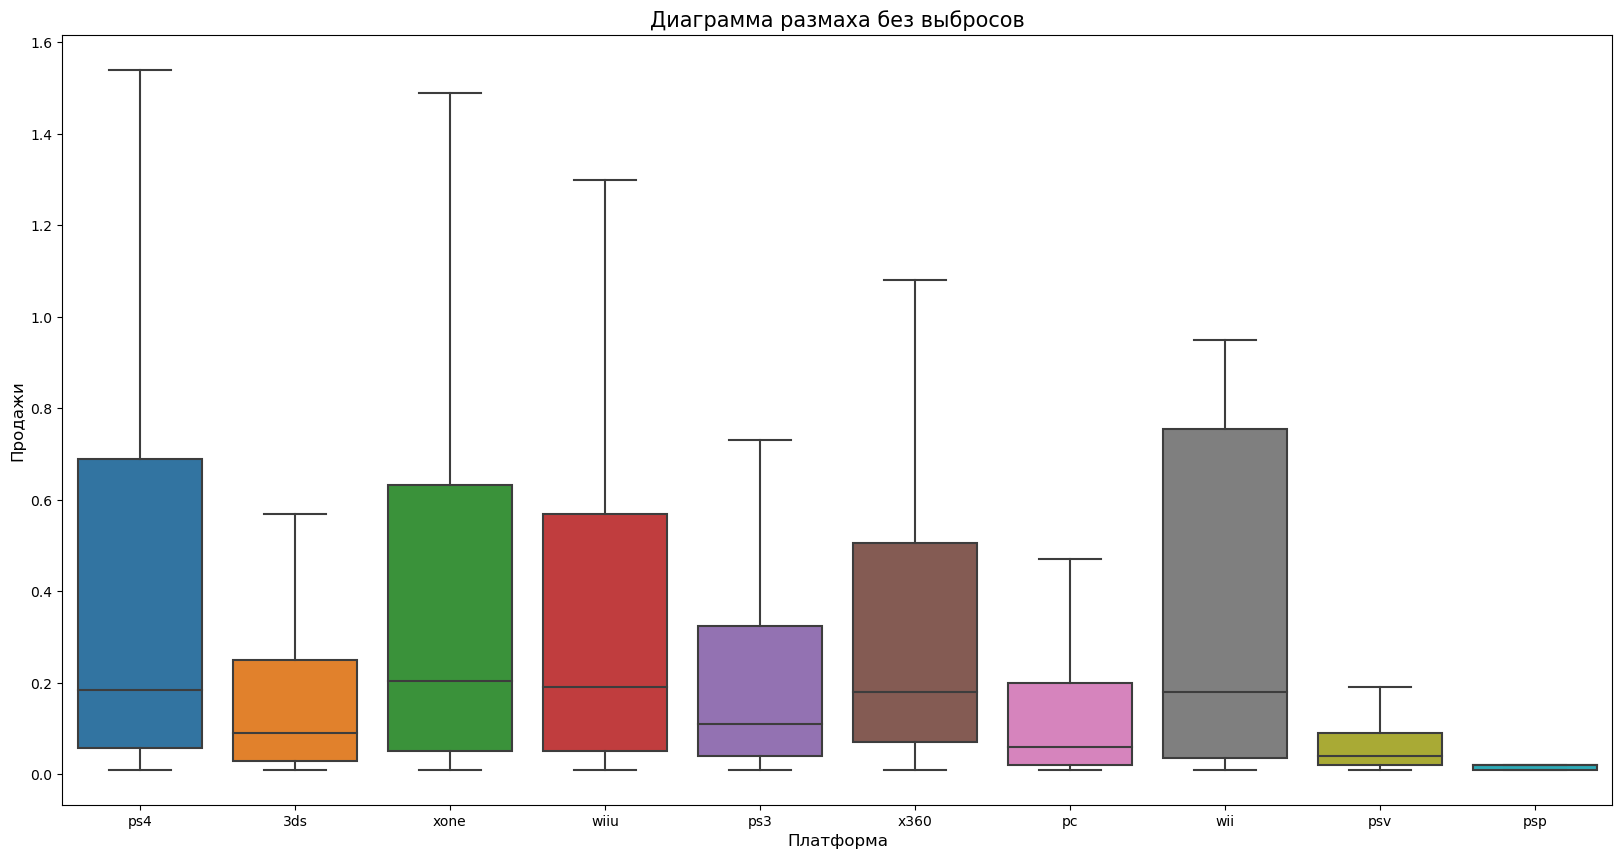

In [49]:
plt.figure(figsize=(20,10))
sns.boxplot(data=new_data, y='total_sales', x='platform', showfliers=False)
plt.title('Диаграмма размаха без выбросов', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Продажи',fontsize=12);

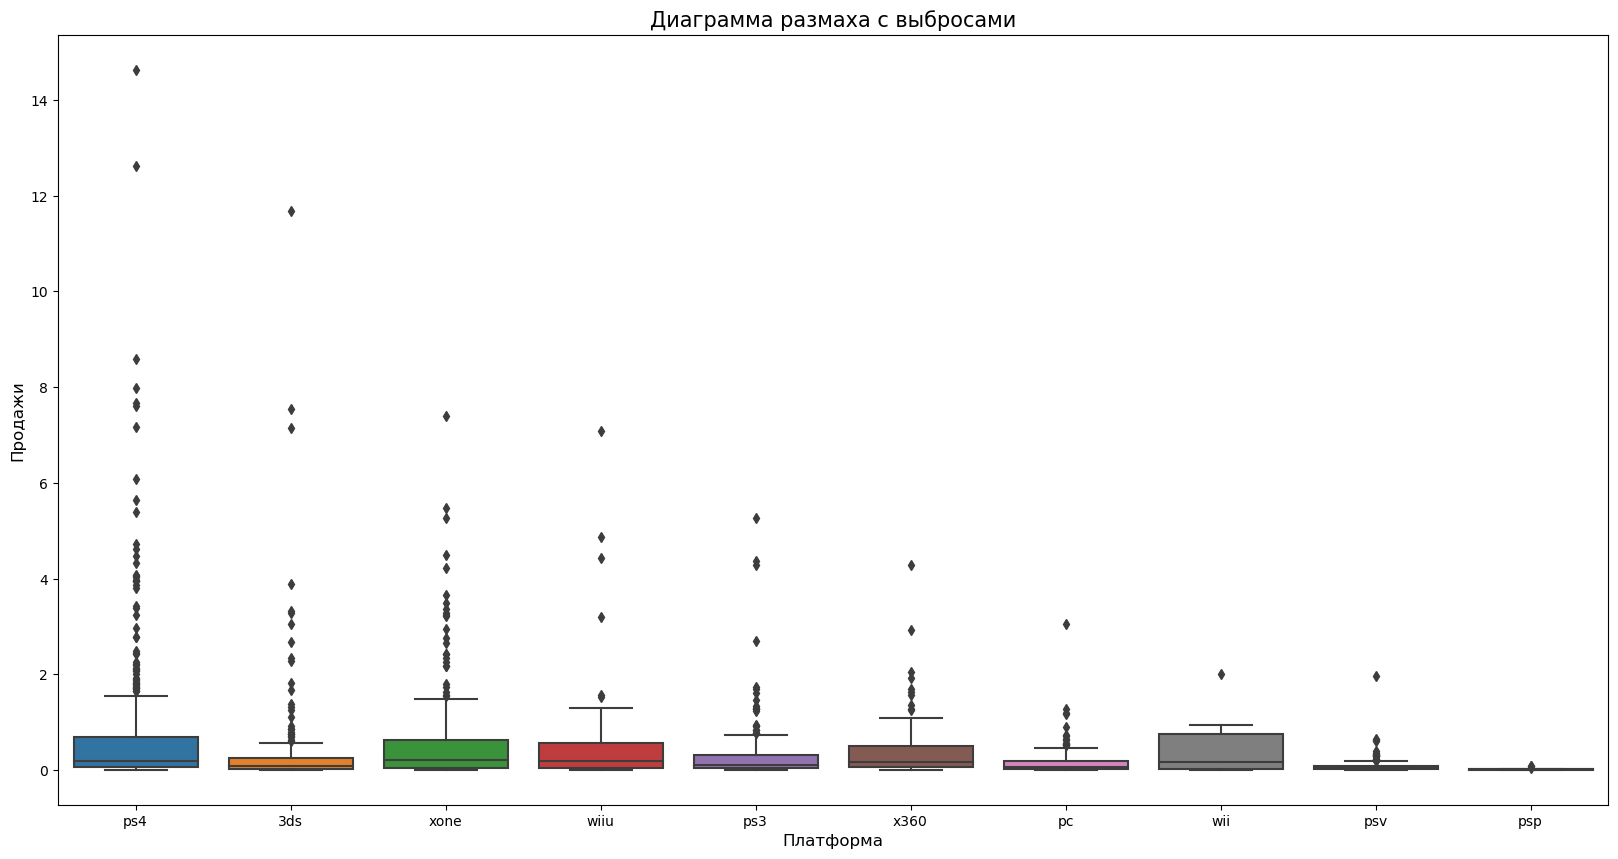

In [50]:
#График со 100% масштабом, выбросами. 
plt.figure(figsize=(20,10))
sns.boxplot(data=new_data, y='total_sales', x='platform')
plt.title('Диаграмма размаха с выбросами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Продажи',fontsize=12);

Выбросы на графиках были скрыты, для наилучшей визуализации.
Анализируя ящики с усами для различных платформ, можно увидеть, что во всех случаях медиана смещена ближе к 1 квартилю (влево). 
У платформ PS4, XOne, Wiiu, X360, WII медианные значения практически не различаются. В данных о продажах на всех платформах много выбросов.
Неплохие продажи за актуальный период у платформ: PS3, Wii, Wiiu, X360, однако можно сказать, что эти платформы уже "выработали" свой потенциал (т.к. уже давно находятся на рынке)и они с малой вероятностью станут перспективными в 2017 году. Вероятнее всего, в данном случае продажи будут и дальше падать.
Наиболее перспективными платформами будем считать PS4, XOne, 3DS - на диаграмме размаха можем заметить, что максимальные продажи за актуальный период именно у этих платформ.
PC - по причине стабильной актуальности и распространенности персональных компьютеров и ноутбуков. 

### Продажи внутри платформы

Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.\
Соотнесите выводы с продажами игр на других платформах.

In [51]:
new_data=data.query('year_of_release>=2014')

In [52]:
#Корреляция общих продаж и отзывов критиков
ps4 = new_data[new_data['platform']=='ps4']
ccorr = ps4['critic_score'].corr(ps4['total_sales'])
print('Коэффициент корреляции Пирсона: {:.2f}'.format(ccorr))

Коэффициент корреляции Пирсона: 0.40


Коэффициент корреляции Пирсона 0,40
Существует умеренная положительная взаимосвязь между оценками критиков и успешностью продаж для платформы ps4.

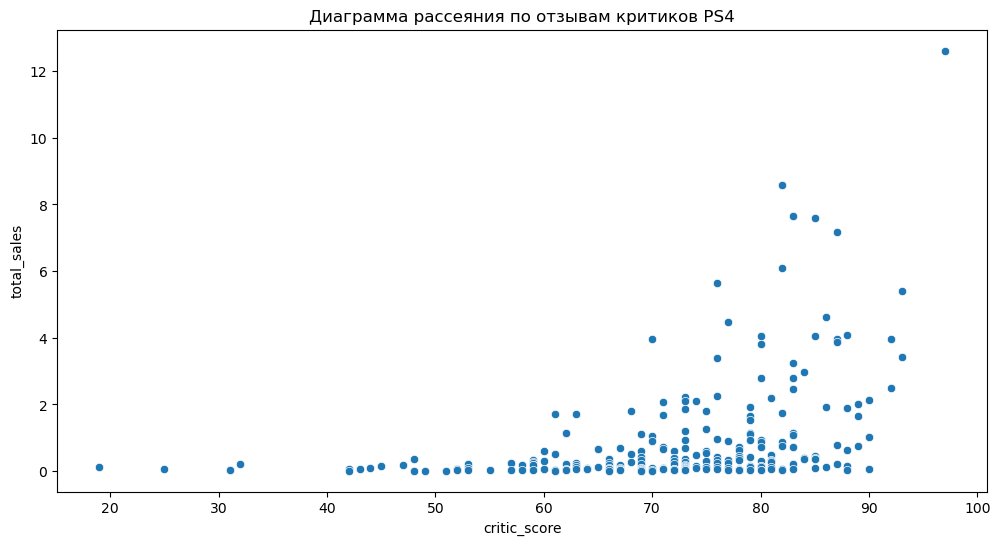

In [53]:
#Построим диаграмму рассеяния
plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='total_sales', data=ps4)
plt.title('Диаграмма рассеяния по отзывам критиков PS4');

In [54]:
#Корреляция общих продаж и отзывов пользователей
ps4 = new_data[new_data['platform']=='ps4']
ccorr = ps4['user_score'].corr(ps4['total_sales'])
print('Коэффициент корреляции Пирсона: {:.2f}'.format(ccorr))

Коэффициент корреляции Пирсона: -0.04


Коэффициент корреляции Пирсона -0,04
Нет четкой взаимосвязи между оценками пользователей и успешностью продаж для платформы ps4.

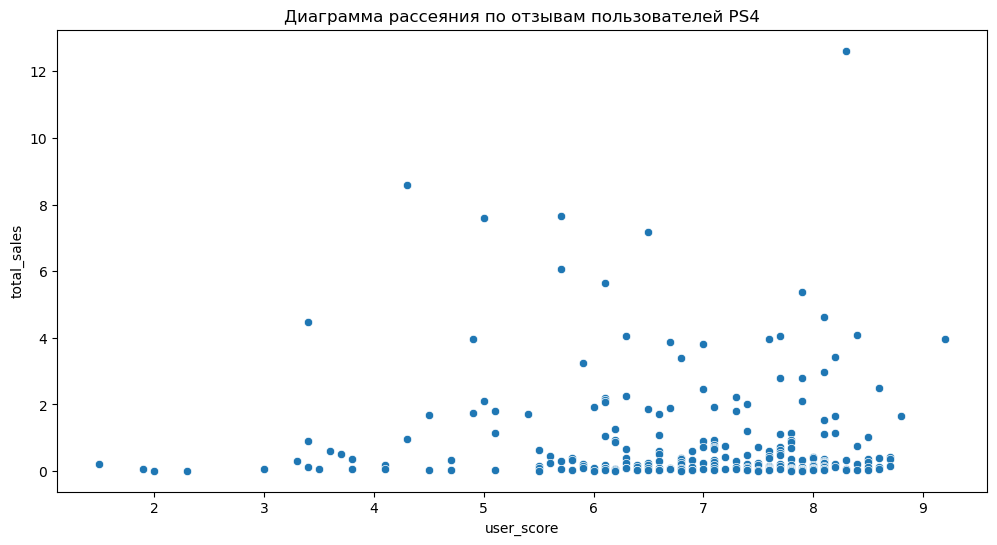

In [55]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='total_sales', data=ps4)
plt.title('Диаграмма рассеяния по отзывам пользователей PS4');

Расчитаем коэффициент корреляции Пирсона для платформы-предшественницы:ps3. Поддержка этой платформы была прекращена к 2016 году. Данная платформа прошла весь "цикл существования" и результаты для нее будут наиболее полными. В то время, как ps4 только набирает популярность.
Данные для расчета коэффициента корреляции возьмем из исходного датафрейма data.

In [56]:
#Корреляция общих продаж и отзывов критиков
ps3 = data[data['platform']=='ps3']
ccorr = ps3['critic_score'].corr(ps3['total_sales'])
print('Коэффициент корреляции Пирсона: {:.2f}'.format(ccorr))

Коэффициент корреляции Пирсона: 0.43


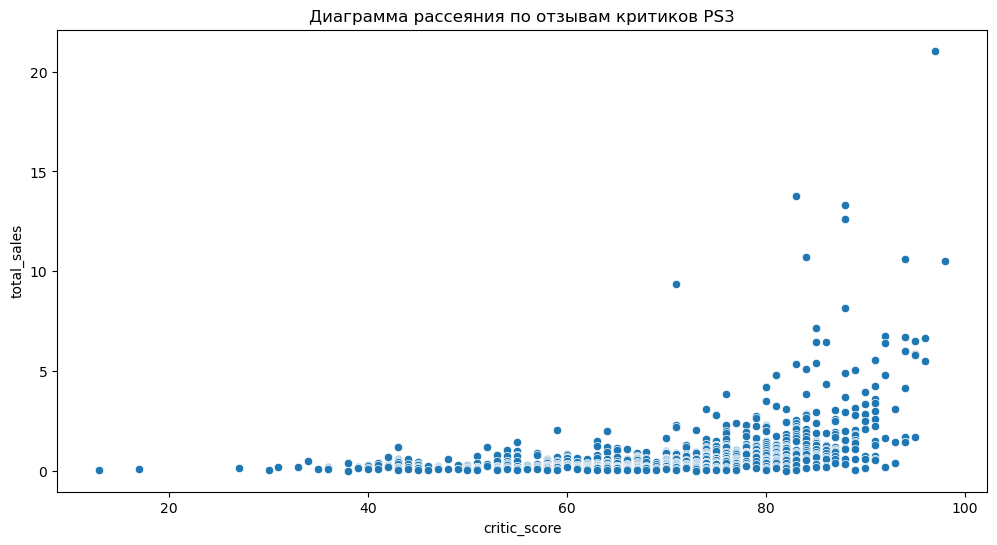

In [57]:
#Построим диаграмму рассеяния
plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='total_sales', data=ps3)
plt.title('Диаграмма рассеяния по отзывам критиков PS3');

Коэффициент корреляции Пирсона 0,43
Существует умеренная положительная взаимосвязь между оценками критиков и успешностью продаж для платформы ps3.
Полученный результат практически повторяет коэффициент корреляции, полученный для платформы ps4.

In [58]:
#Корреляция общих продаж и отзывов пользователей
ps3 = data[data['platform']=='ps3']
ccorr = ps3['user_score'].corr(ps3['total_sales'])
print('Коэффициент корреляции Пирсона: {:.2f}'.format(ccorr))

Коэффициент корреляции Пирсона: 0.13


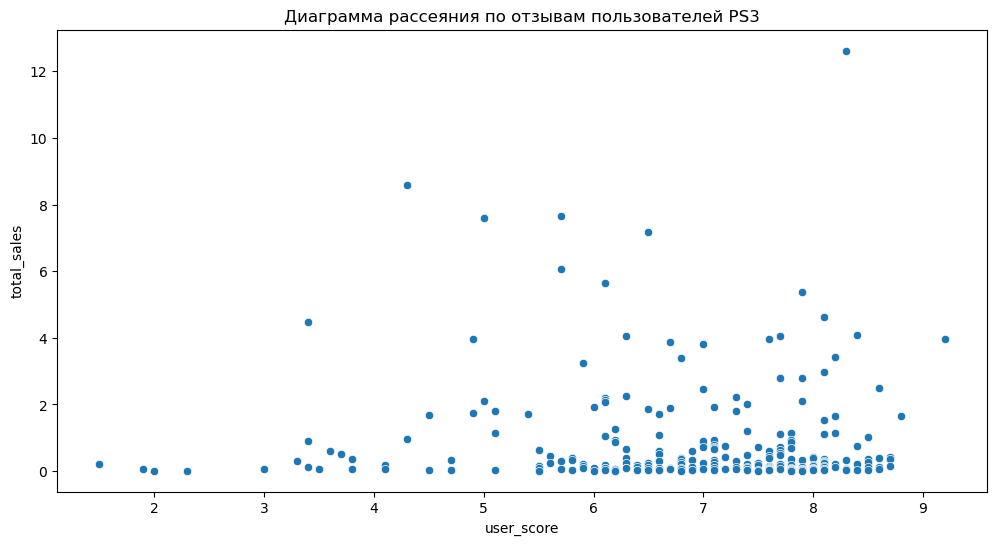

In [59]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='total_sales', data=ps4)
plt.title('Диаграмма рассеяния по отзывам пользователей PS3');

Коэффициент корреляции Пирсона 0,13
Существует очень слабая положительная взаимосвязь между оценками пользователей и успешностью продаж для платформы ps3.


Мнения критиков значительно больше коррелирует с общими продажами, по сравнению с оценками пользователей.
Оценка пользователя не влияет на успешность продаж.
По данным корреляции можно сделать вывод, что зависимость между продажами и отзывами критиков есть, но ниже средней.

### Наиболее прибыльные жанры:

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [60]:
# Методом сводных таблиц выведем жанры и их продажи.  отсортируем по убыванию. 
new_genre = new_data.pivot_table(index='genre', 
                           values='total_sales', 
                           aggfunc='sum').sort_values(by='total_sales', ascending=False)
new_genre = new_genre.reset_index().rename_axis(None, axis=1)
new_genre

,genre,total_sales
0,action,199.36
1,shooter,170.94
2,sports,109.48
3,role-playing,101.44
4,misc,37.55
5,fighting,28.22
6,racing,27.52
7,platform,18.09
8,adventure,17.55
9,simulation,13.13


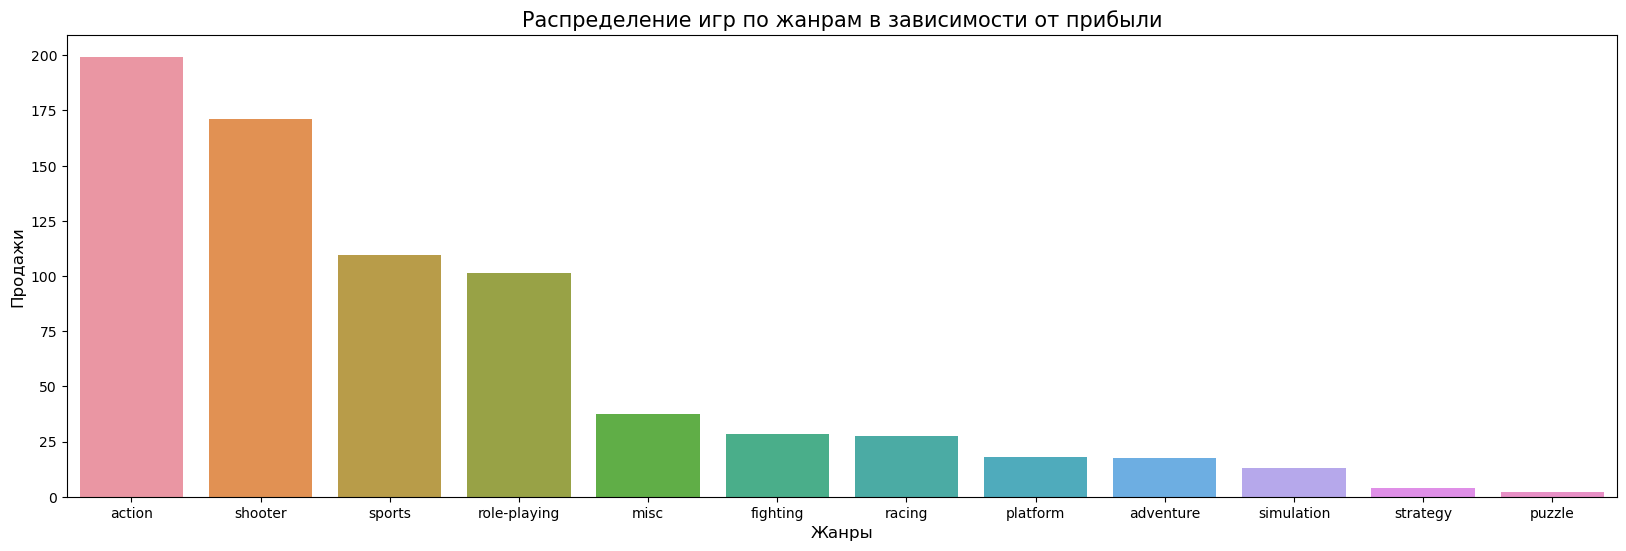

In [61]:
#Визуализируем
plt.figure(figsize=(20,6))
plt.title('Распределение игр по жанрам в зависимости от прибыли',fontsize=15)
sns.barplot(data=new_genre, x='genre', y='total_sales')
plt.xlabel('Жанры',fontsize=12)
plt.ylabel('Продажи',fontsize=12);

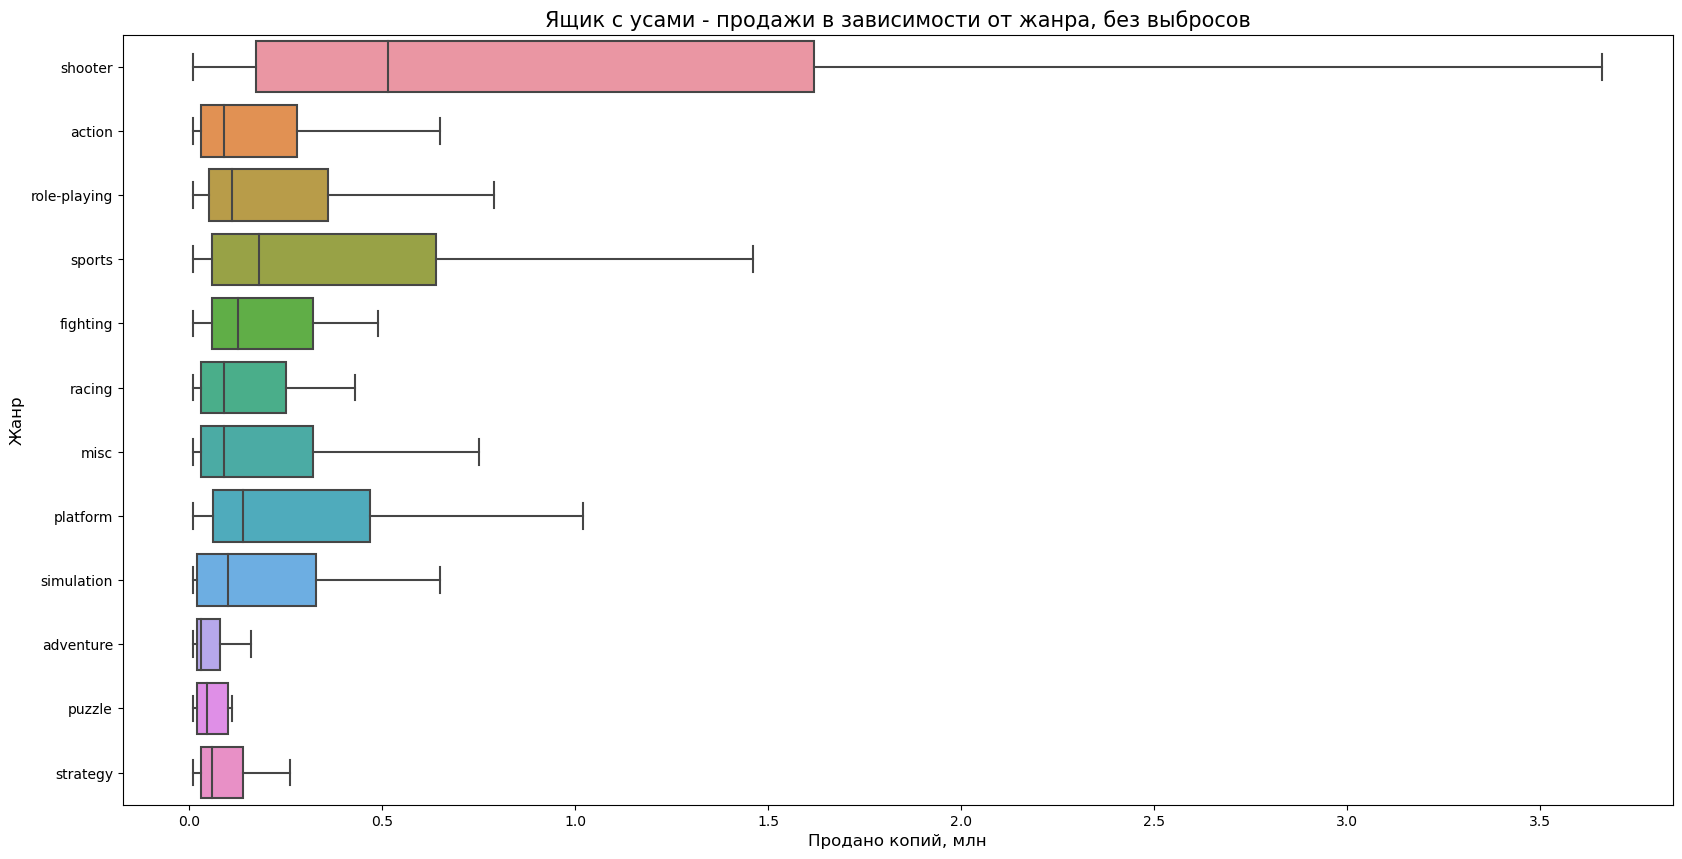

In [62]:
plt.figure(figsize=(20,10))
sns.boxplot(data=new_data, y='genre', x='total_sales', showfliers=False)
plt.title('Ящик с усами - продажи в зависимости от жанра, без выбросов', fontsize=15)
plt.xlabel('Продано копий, млн', fontsize=12)
plt.ylabel('Жанр',fontsize=12);

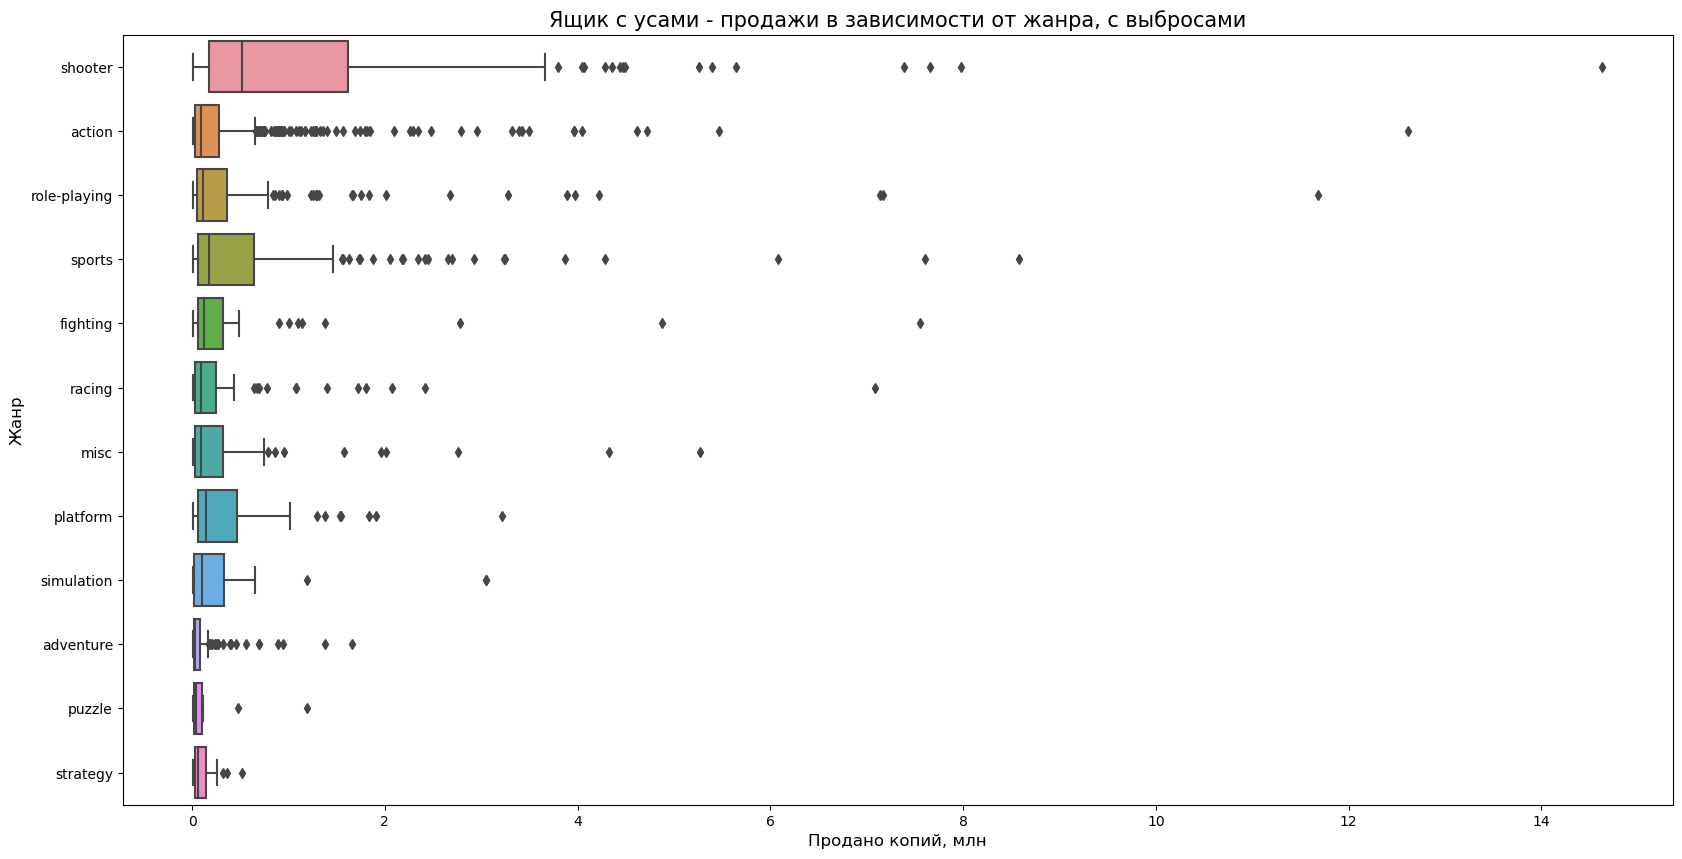

In [63]:
plt.figure(figsize=(20,10))
sns.boxplot(data=new_data, y='genre', x='total_sales', showfliers=True)
plt.title('Ящик с усами - продажи в зависимости от жанра, с выбросами', fontsize=15)
plt.xlabel('Продано копий, млн', fontsize=12)
plt.ylabel('Жанр',fontsize=12);

В топ-3 прибыльных жанра игр входят: "Action", "Shooter", "sports".\
Жанр "Action" вырвался на первое место по продажам за счет большого количества выбросов.
К числу наиболее "стабильных" жанров, в которых имеется более длинный ряд успешно продающихся игр, можно отнести "sports" и "platform".
Жанры "Puzzle" и "adventure" возглавляют список аутсайдеров.

<div class="alert alert-d anger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />        
Стоит проанализировать прибыльность жанров на диаграмме размаха, сравнить медианные продажи на каждом жанре и проверить какая из них более стабильна и имеет более длинный ряд успешно продающихся игр
        
График нарисовать __в двух масштабах с выбросами и без__ (чтобы было видно 0.75-квантиль)

### Выводы "Шаг 3"

В разные годы выпускалось от 9 млн (за период до 1994года) до 1427 млн игр в 2008-2009 году. Последние годы - с 2012 до 2016 года показатели продаж игр вышли на плато и  колеблются на уровне, который не сильно превышает значения 2001 года.
Для того, чтобы отработать принцип работы с данными и составить прогноз на будущее, оставили  данные за последние 2 года (2014-2016)– актуальный период.\
Период существования платформ длится около 10 лет. Платформы придерживаются одной и той же тенденции: Через 4-5 лет после релиза платформы продажи игр для нее достигают пика, а затем, более медленно идут на спад.\
Наиболее перспективными на 2017 год платформами являются: PS4, 3DS, XOne, PC.\
PS4 и XOne, вышедшие в 2013 году, наиболее перспективны, т.к. еще не достигли пика своей популярности.\
Мнения критиков значительно коррелируют с общими продажами(Существует умеренная положительная взаимосвязь.
Оценка пользователя не влияет на успешность продаж.
В топ-3 прибыльных жанра игр входят: "Action", "Shooter", "sports". Жанры "Puzzle" и "adventure" возглавляют список аутсайдеров с наиболее низкими продажами.

## Шаг.  Составляем портрет пользователя каждого региона (NA, EU, JP)

### Самые популярные платформы (топ-5). Опишите различия в долях продаж.


In [64]:
# Топ 5 платформ в Северной Америке
na_platform=new_data.pivot_table(index='platform',values='na_sales',aggfunc=('sum'))
na_platform=na_platform.sort_values(by='na_sales',ascending=False).head(5)
na_platform

,na_sales
platform,
ps4,98.61
xone,81.27
x360,28.30
3ds,22.64
ps3,22.05


In [65]:
# Топ 5 платформ в Европе
eu_platform=new_data.pivot_table(index='platform',values='eu_sales',aggfunc=('sum'))
eu_platform=eu_platform.sort_values(by='eu_sales',ascending=False).head(5)
eu_platform

,eu_sales
platform,
ps4,130.04
xone,46.25
ps3,25.54
pc,17.97
3ds,16.12


In [66]:
# Топ 5 платформ в Японии
jp_platform=new_data.pivot_table(index='platform',values='jp_sales',aggfunc=('sum'))
jp_platform=jp_platform.sort_values(by='jp_sales',ascending=False).head(5)
jp_platform

,jp_sales
platform,
3ds,44.24
ps4,15.02
psv,14.54
ps3,11.22
wiiu,7.31


In [67]:
# Круговая диаграмма - топ 5 платформ в Северной Америке - Европе - Японии
def pie_sales(x, y, title):
    sales = new_data.groupby(x)[y].sum().sort_values(ascending=False)
    sales_top = sales[:5]
    sales_top['other'] = sales.sum()-sales[:5].sum()
    sales_top.plot(kind='pie', autopct='%1.0f%%');
    plt.title(title)
    return plt.show()

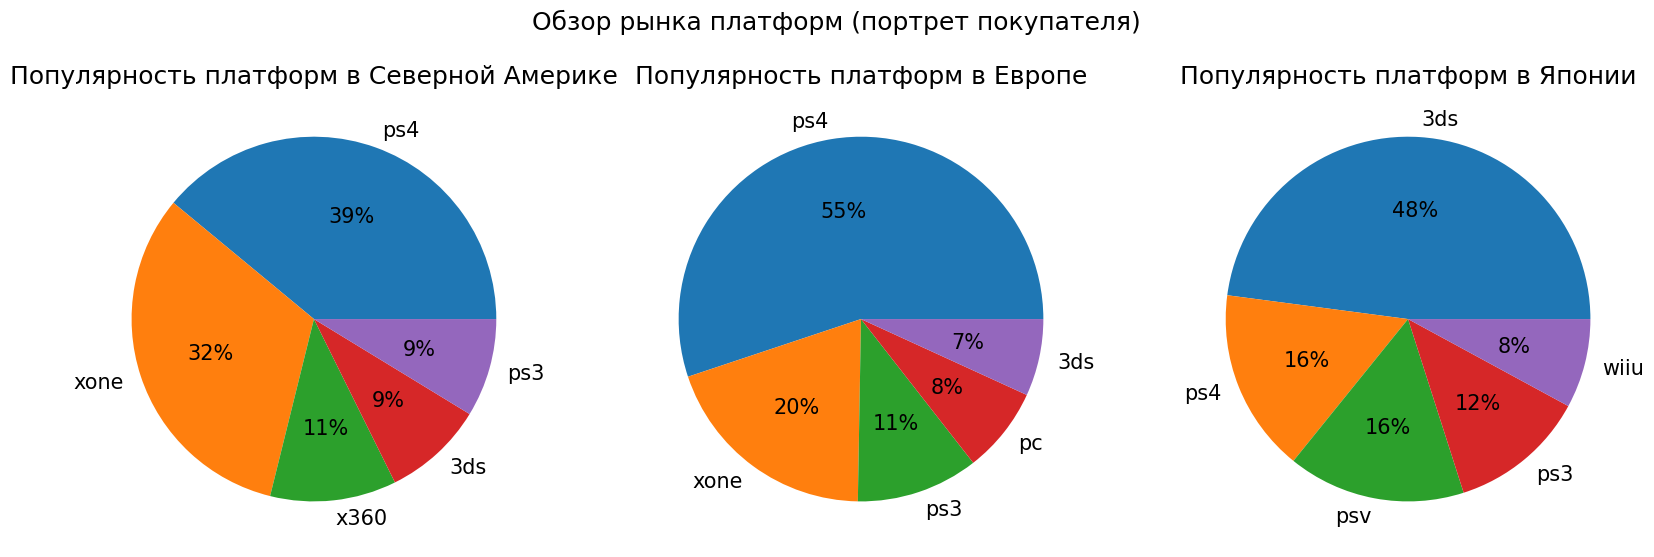

In [68]:
fig, (ax0,ax1,ax2) = plt.subplots(nrows=1,ncols=3,figsize=(20,20))
 
plt.rc('font', size= 15 )
 
fig. suptitle('Обзор рынка платформ (портрет покупателя)', y=0.65)
na_platform.plot(kind='pie',y='na_sales', legend=False, autopct='%.0f%%',title='Популярность платформ в Северной Америке',ax=ax0)
ax0.set(ylabel='')
 
eu_platform.plot(kind='pie',y='eu_sales',legend=False, autopct='%.0f%%', title='Популярность платформ в Европе',ax=ax1)
ax1.set(ylabel='')
 
jp_platform.plot(kind='pie',y='jp_sales',legend=False, autopct='%.0f%%', title='Популярность платформ в Японии',ax=ax2)
ax2.set(ylabel='')
 
plt.show()

В Северной Америке - Наиболее популярна платформа PlayStation 4, наименее популярны Nintendo 3DS и PlayStation3\
В Европе - Наиболее популярна PlayStation 4, наименее популярна Nintendo 3DS\
В Японии - Наиболее популярна Nintendo 3DS, наименее популярна Wii U

### Самые популярные жанры (топ-5). Поясните разницу.

In [69]:
# Топ 5 жанров в Северной Америке
na_genre=new_data.pivot_table(index='genre',values='na_sales',aggfunc=('sum'))
na_genre=na_genre.sort_values(by='na_sales',ascending=False).head(5)
na_genre

,na_sales
genre,
shooter,79.02
action,72.53
sports,46.13
role-playing,33.47
misc,15.05


In [70]:
# Топ 5 жанров в Европе
eu_genre=new_data.pivot_table(index='genre',values='eu_sales',aggfunc=('sum'))
eu_genre=eu_genre.sort_values(by='eu_sales',ascending=False).head(5)
eu_genre

,eu_sales
genre,
action,74.68
shooter,65.52
sports,45.73
role-playing,28.17
racing,14.13


In [71]:
# Топ 5 жанров в Северной Америке
jp_genre=new_data.pivot_table(index='genre',values='jp_sales',aggfunc=('sum'))
jp_genre=jp_genre.sort_values(by='jp_sales',ascending=False).head(5)
jp_genre

,jp_sales
genre,
role-playing,31.16
action,29.58
fighting,6.37
misc,5.61
shooter,4.87


In [72]:
def pie_genres(x, y, title):
    genres = new_data.groupby(x)[y].sum().sort_values(ascending=False)
    genres_top = genres[:5]
    genres_top['other'] = genres.sum()-genres[:5].sum()
    genres_top.plot(kind='pie', autopct='%1.0f%%');
    plt.title(title)
    return plt.show()

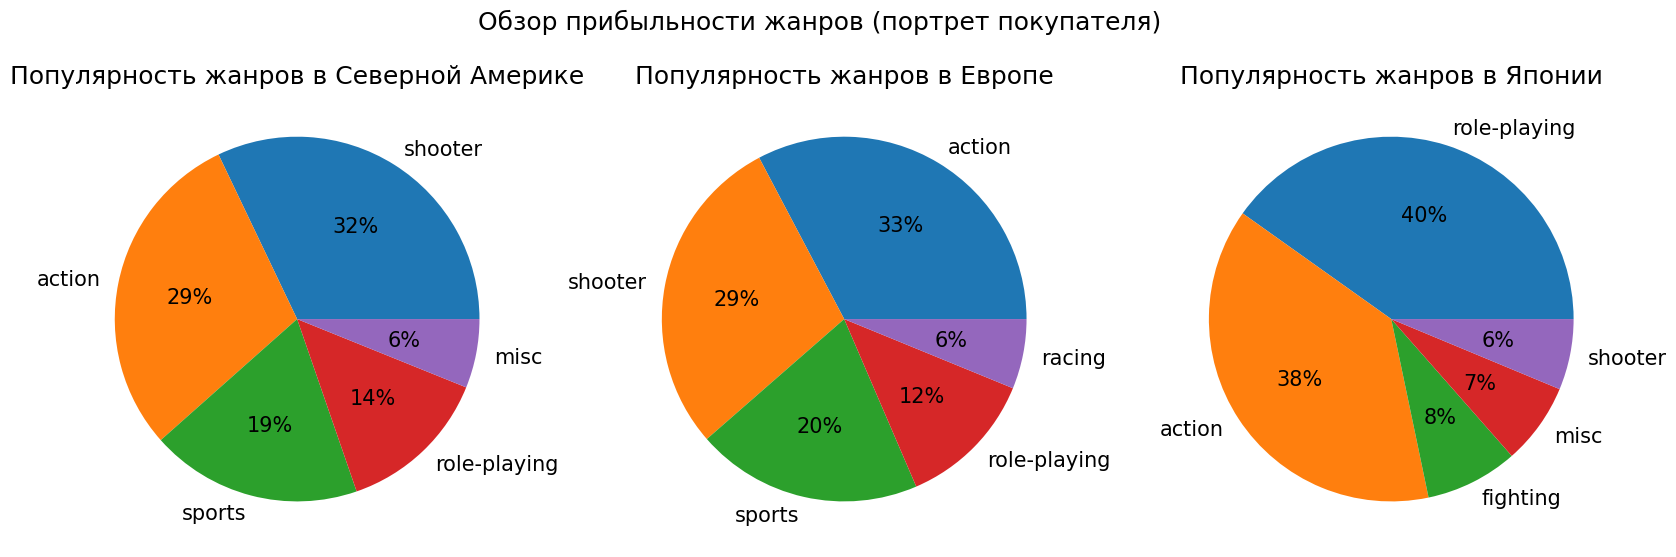

In [73]:
fig, (ax0,ax1,ax2) = plt.subplots(nrows=1,ncols=3,figsize=(20,20))
 
plt.rc('font', size= 15 )
 
fig. suptitle('Обзор прибыльности жанров (портрет покупателя)', y=0.65)
na_genre.plot(kind='pie',y='na_sales', legend=False, autopct='%.0f%%',title='Популярность жанров в Северной Америке',ax=ax0)
ax0.set(ylabel='')
 
eu_genre.plot(kind='pie',y='eu_sales',legend=False, autopct='%.0f%%', title='Популярность жанров в Европе',ax=ax1)
ax1.set(ylabel='')
 
jp_genre.plot(kind='pie',y='jp_sales',legend=False, autopct='%.0f%%', title='Популярность жанров в Японии',ax=ax2)
ax2.set(ylabel='')
 
plt.show()

Наиболее популярные жанры игр в Северной Америке - Action, Shooter, наименее популярный Misc\
Наиболее популярный жанр игр в Европе - Action, наименее популярный Racing\
Наиболее популярный жанр игр в Японии - Role-Playing, наименее популярны Shooter и misc.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?


In [74]:
#В первоначальном датафрейме количество уникальных позиций рейтинга вдвое больше. В 1998 году позиции переименованы. 
data['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

In [75]:
new_data['rating'].unique()

array(['unknown', 'M', 'E', 'T', 'E10+'], dtype=object)

В new_data всего 4 возрастных категории:

M - Подходит для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Также может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков.\
E - Подходит для всех возрастных категорий. Игра не должна содержать звуков или изображений, которые могут напугать маленьких детей. Не должна использоваться ненормативная лексика.\
E10+ - Подходит для лиц старше 10 лет. Игра может содержать умеренные формы насилия, а некоторые сцены могут пугать детей.\
T - Подходит для лиц старше 13 лет. Игра может содержать более реалистичные и натуралистические сцены насилия. 

In [76]:
# Соотношение рейтинга ESRB и продаж в Северной Америке
na_ESRB=new_data.pivot_table(index='rating',values='na_sales',aggfunc=('sum'))
na_ESRB=na_ESRB.sort_values(by='na_sales',ascending=False)
na_ESRB

,na_sales
rating,
M,96.42
unknown,64.72
E,50.74
T,38.95
E10+,33.23


In [77]:
eu_sales_ESRB=new_data.pivot_table(index='rating',values='eu_sales',aggfunc=('sum'))
eu_sales_ESRB=eu_sales_ESRB.sort_values(by='eu_sales',ascending=False)
eu_sales_ESRB
# Соотношение рейтинга ESRB и продаж в Европе

,eu_sales
rating,
M,93.44
unknown,58.95
E,58.06
T,34.07
E10+,26.16


In [78]:
jp_ESRB=new_data.pivot_table(index='rating',values='jp_sales',aggfunc=('sum'))
jp_ESRB=jp_ESRB.sort_values(by='jp_sales',ascending=False)
jp_ESRB
# Соотношение рейтинга ESRB и продаж в Японии

,jp_sales
rating,
unknown,56.90
T,14.78
E,8.94
M,8.01
E10+,4.46


Визуализируем данные:

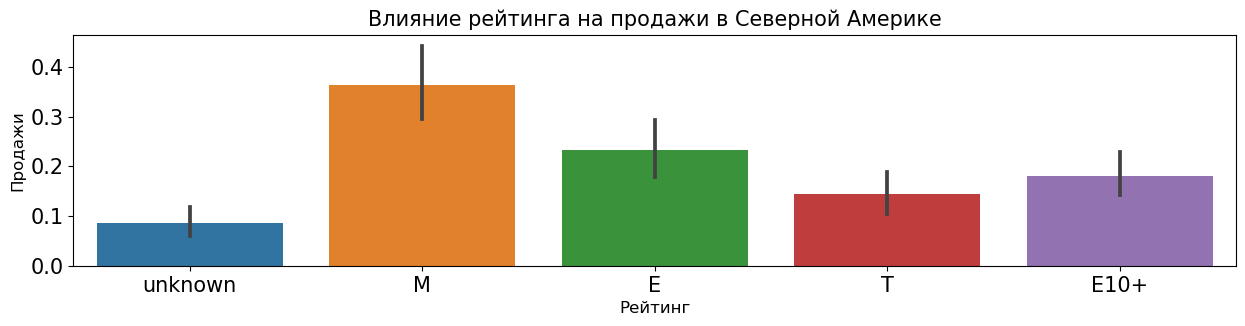

In [79]:
plt.figure(figsize=(15,3))
plt.title('Влияние рейтинга на продажи в Северной Америке',fontsize=15)
sns.barplot(data=new_data, x='rating', y='na_sales')
plt.xlabel('Рейтинг',fontsize=12)
plt.ylabel('Продажи',fontsize=12);

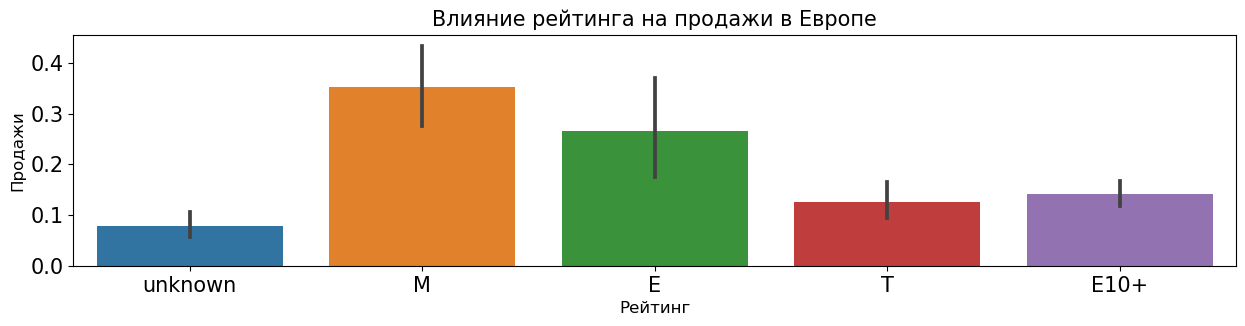

In [80]:
plt.figure(figsize=(15,3))
plt.title('Влияние рейтинга на продажи в Европе',fontsize=15)
sns.barplot(data=new_data, x='rating', y='eu_sales')
plt.xlabel('Рейтинг',fontsize=12)
plt.ylabel('Продажи',fontsize=12);

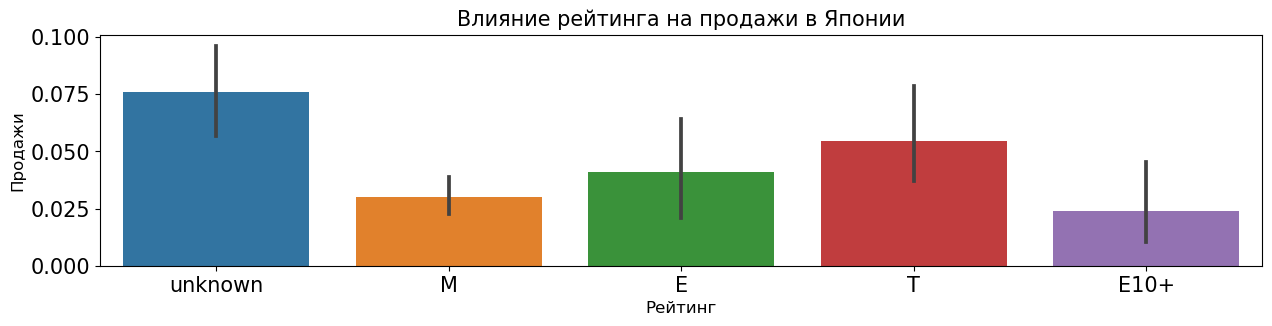

In [81]:
plt.figure(figsize=(15,3))
plt.title('Влияние рейтинга на продажи в Японии',fontsize=15)
sns.barplot(data=new_data, x='rating', y='jp_sales')
plt.xlabel('Рейтинг',fontsize=12)
plt.ylabel('Продажи',fontsize=12);

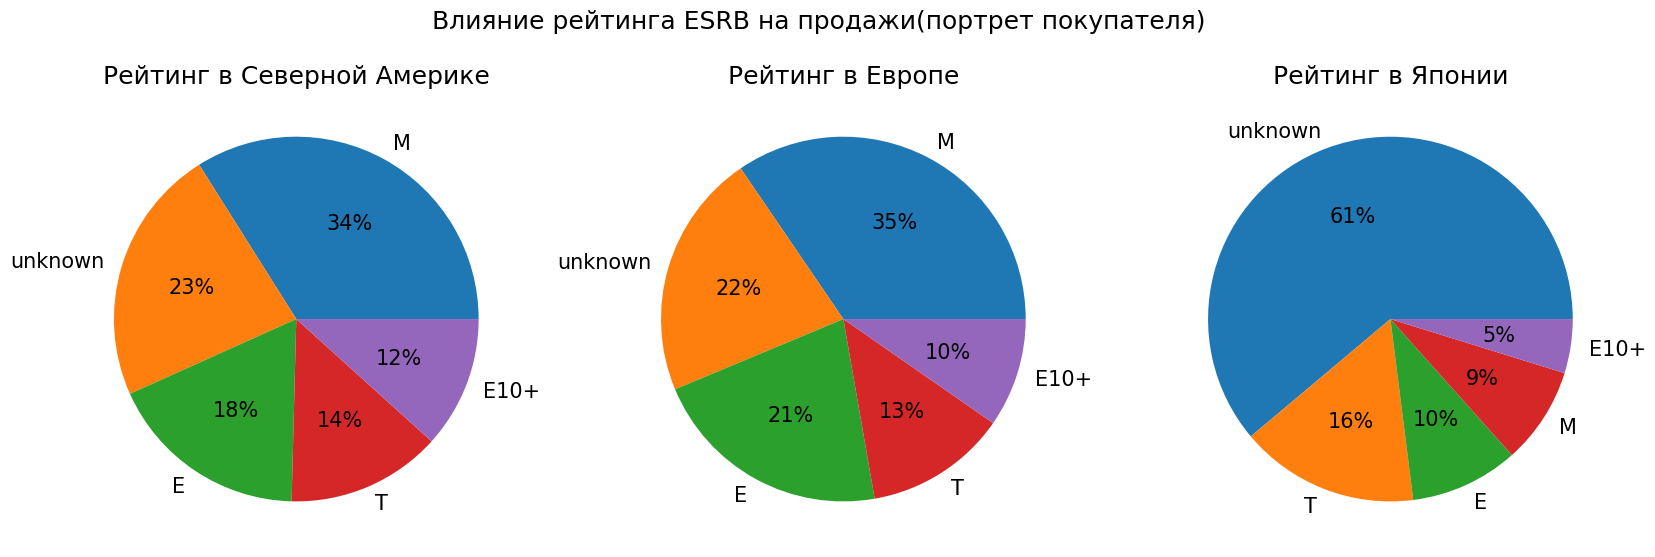

In [82]:
fig, (ax0,ax1,ax2) = plt.subplots(nrows=1,ncols=3,figsize=(20,20))
 
plt.rc('font', size= 15 )
 
fig. suptitle('Влияние рейтинга ESRB на продажи(портрет покупателя)', y=0.65)
na_ESRB.plot(kind='pie',y='na_sales', legend=False, autopct='%.0f%%',title='Рейтинг в Северной Америке',ax=ax0)
ax0.set(ylabel='')
 
eu_sales_ESRB.plot(kind='pie',y='eu_sales',legend=False, autopct='%.0f%%', title='Рейтинг в Европе',ax=ax1)
ax1.set(ylabel='')
 
jp_ESRB.plot(kind='pie',y='jp_sales',legend=False, autopct='%.0f%%', title='Рейтинг в Японии',ax=ax2)
ax2.set(ylabel='')
 
plt.show()

В Северной Америке и Европе очень похожие предпочтения игр: Подавляющее большинство пользователей предпочитает игры для взрослых (М). И наименее популярны игры для категории 10+\
В Японии очень много игр с неизвестным рейтингом. Продажи таких игр наиболее многочислены.
Игры с игровым рейтингом  Т (для лиц старше 13 лет) идут по популярности вслед за играми с "неизвестным жанром". Наименьший спрос имеют игры для возраста 10+ (Е10+).

В Японии существует собственная система возрастных рейтингов, с более жесткой цензурой, которй занимается CERO – некоммерческая организация.
Некоторые игры с чрезмерным насилием, так популярные во всем мире, могут и вовсе не попасть на Японский рынок. Это является большой проблемой для западных разработчиков игр. 
         Японский игровой рынок заполнен играми местного производства, которые популярны только в Японии.В целом, Япония часто выделяется из общего списка во многих мировых рейтингах. Во многом, сказывается то, что Япония - островное государство. Здесь совсем иная культура, и, соответственно, предпочтения пользователей.

**Вывод**

Платформа, жанр и рейтинг по-разному влияют на продажи в регионе релиза.\
Разный контингент - разные предпочтения.

### Выводы "Шаг 4"

## Шаг. Проверка гипотез

### 	Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Сформулируем нулевую и альтернативную гипотезы:\
Н0:Средние пользовательские рейтинги платформ Xbox One и PC равны\
Н1:Средние пользовательские рейтинги платформ Xbox One и PC не равны

Будем использовать t-критерий Стьюдента, так как сравниваемые выборки независимы между собой.
Для проверки гипотез будем использовать метод о равенстве среднего двух генеральных совокупностей по взятым из них выборкам. 

In [83]:
xone = new_data[(new_data['platform'] == 'xone') & (new_data['user_score'] > 0)] 
pc = new_data[(new_data['platform'] == 'pc') & (new_data['user_score'] > 0)] 

In [84]:
xone.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,165.000000,165.000000,165.000000,165.000000,165.000000,151.000000,165.000000,165.000000
mean,2015.133333,0.405939,0.231394,0.001636,0.062485,74.125828,6.594545,0.701455
std,0.807989,0.624772,0.386288,0.005874,0.093401,12.139360,1.375139,1.029264
min,2014.000000,0.000000,0.000000,0.000000,0.000000,20.000000,1.600000,0.010000
25%,2014.000000,0.040000,0.020000,0.000000,0.010000,67.000000,5.800000,0.060000
50%,2015.000000,0.150000,0.080000,0.000000,0.020000,76.000000,6.800000,0.260000
75%,2016.000000,0.440000,0.230000,0.000000,0.080000,83.000000,7.600000,0.910000
max,2016.000000,3.220000,2.190000,0.040000,0.480000,97.000000,9.200000,5.470000


In [85]:
pc.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,122.000000,122.000000,122.000000,122.0,122.000000,115.000000,122.000000,122.000000
mean,2015.057377,0.056721,0.126803,0.0,0.013852,76.286957,6.298361,0.197377
std,0.826215,0.121977,0.206575,0.0,0.026674,9.781620,1.703278,0.346068
min,2014.000000,0.000000,0.000000,0.0,0.000000,43.000000,1.400000,0.010000
25%,2014.000000,0.000000,0.030000,0.0,0.000000,71.000000,5.325000,0.030000
50%,2015.000000,0.000000,0.060000,0.0,0.010000,77.000000,6.800000,0.080000
75%,2016.000000,0.080000,0.130000,0.0,0.020000,83.500000,7.600000,0.227500
max,2016.000000,1.000000,1.820000,0.0,0.230000,96.000000,9.300000,3.050000


Обнаружили, что дисперсии в двух выборках разные, добавим в ttest соответствующий параметр: equal_var=False.

In [86]:
alpha = 0.05
# вызов метода для проверки гипотезы:
results = st.ttest_ind(xone['user_score'], pc['user_score'], equal_var=False)
 
print('p-value:', results.pvalue)
      
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу и принимаем альтернативную')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


p-value: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


Выводы:

Средние пользовательские рейтинги платформ Xbox One и PC равны.\
p-value больше зафиксированного уровня статистической значимости.\
На имеющихся данных, на уровне значимости 5% (уровне доверия 95%) нет оснований отвергнуть нулевую гипотезу в пользу альтернативной.

Прежде чем проводить статистический тест, мы должны задать уровень статистической значимости - alpha - вероятность отвергнуть нулевую гипотезу, задает пороговое значение стат. теста
P-value – это минимальный уровень значимости, на котором нулевая гипотеза может быть отвергнута. Соответственно, если p-value меньше уровня статистической значимости, тогда мы можем отвергнуть нулевую гипотезу в пользу альтернативной.
Чем меньше значение p-value, по сравнению с alpha, тем больше вероятность того, что мы отвергнем нулевую гипотезу и примем альтернативную.
Чем выше p-value, тем меньше вероятность того, что нулевая гипотеза не будет отвергнута.\
∙ p-value < 𝛼 ⇒ 𝐻0 отвергаем на уровне значимости 𝛼, на имеющихся данных\
∙ p-value > 𝛼 ⇒ 𝐻0 не отвергаем на уровне значимости 𝛼, на имеющихся данных

In [87]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:

    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Сформулируем нулевую и альтернативную гипотезы:\
Н0:Средние пользовательские рейтинги жанров Action и Sports равны.
Н1:Средние пользовательские рейтинги жанров Action и Sports разные.

In [88]:
action = new_data[(new_data['genre'] == 'action') & (new_data['user_score'] > 0)]
sports = new_data[(new_data['genre'] == 'sports') & (new_data['user_score'] > 0)]

In [89]:
action.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,297.000000,297.000000,297.000000,297.00000,297.000000,227.000000,297.000000,297.000000
mean,2014.936027,0.196128,0.204916,0.02963,0.061414,70.515419,6.760606,0.492088
std,0.796497,0.403820,0.489807,0.06873,0.156568,12.037312,1.377852,1.050715
min,2014.000000,0.000000,0.000000,0.00000,0.000000,26.000000,2.000000,0.010000
25%,2014.000000,0.010000,0.020000,0.00000,0.000000,65.500000,6.100000,0.060000
50%,2015.000000,0.060000,0.060000,0.00000,0.020000,72.000000,7.100000,0.160000
75%,2016.000000,0.210000,0.210000,0.02000,0.050000,77.000000,7.700000,0.510000
max,2016.000000,3.960000,6.310000,0.49000,1.970000,97.000000,9.000000,12.620000


In [90]:
sports.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,127.000000,127.000000,127.000000,127.000000,127.000000,83.000000,127.000000,127.000000
mean,2014.937008,0.361811,0.355591,0.013622,0.112283,70.518072,5.225197,0.843307
std,0.804235,0.517924,0.915363,0.036681,0.200155,16.718882,1.856604,1.350431
min,2014.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.200000,0.010000
25%,2014.000000,0.030000,0.030000,0.000000,0.010000,61.000000,4.000000,0.110000
50%,2015.000000,0.150000,0.090000,0.000000,0.040000,76.000000,5.500000,0.410000
75%,2016.000000,0.420000,0.250000,0.000000,0.130000,82.500000,6.650000,0.930000
max,2016.000000,2.490000,6.120000,0.220000,1.280000,90.000000,8.800000,8.580000


In [91]:
alpha = 0.05
# вызов метода для проверки гипотезы:
results = st.ttest_ind(action['user_score'], sports['user_score'], equal_var=False)
 
print('p-value', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу и принимаем альтернативную')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value 1.1825550382644557e-14
Отвергаем нулевую гипотезу и принимаем альтернативную


Выводы:

Средние пользовательские рейтинги жанров Action и Sports разные.\
p-value меньше зафиксированного уровня статистической значимости.\
На имеющихся данных, на уровне значимости 5% (уровне доверия 95%) отвергаем нулевую гипотезу в пользу альтернативной.

## Шаг. Итоговые выводы

Общие выводы:
Нами были получены исторические данные о продажах игр на различных платформах, за период с 1980 по 2016 год. Для начала, мы произвели загрузку данных, проверили корректность их вывода и изучили недостатки. Нами был обнаружен некорректно указанный тип данных в столбце 'user_score' и 'year_of_release', который впоследствии был изменен с object на float64.\
В столбце 'user_score' преобразовали значения 'tbd' -> 'nan' -> 'unknown'.Оставили нетронутыми пропуски в столбцах 'year_of_release', 'critic_score', 'user_score' незаполненными по причине отсутствия данных для корректной замены. Определили причины, по которым эти пропуски могли возникнуть (Невозможность получения, поломки оборудования, сокрытие информации, человеческий фактор.). Также были обнаружены пропуски данных в столбцах: 'name', 'genre', которые были удалены. \

Для удобства работы привели названия столбцов к нижнему регистру и создали столбец с суммарными продажами игры - 'total_sales'. Были найдены и устранены неявные дубликаты.\
В ходе исследовательского анализа данных мы выяснили следующее:
В разные годы выпускалось от 9 млн (за период  до 1994года) до 1427 млн игр в 2008-2009 году. 
Период существования платформ длится около 10 лет.  Через 4-5 лет после релиза платформы продажи  достигают пика.
Наиболее перспективными на 2017 год платформами являются: PS4, 3DS, XOne, PC.
PS4 и XOne, вышедшие в 2013 году, еще не достигли пика своей популярности. Продажи игр для остальных платформ продолжают снижаться.
Для того,  чтобы отработать принцип работы с данными и составить прогноз на будущее, оставили  данные за последние 2 года – актуальный период.\
Мнения критиков  коррелируют с общими продажами :существует умеренная положительная взаимосвязь. Оценка пользователя не влияет на успешность продаж.\
В топ-3 прибыльных жанра игр входят: "Action", "Shooter", "sports". Жанры "Puzzle" и "adventure" возглавляют список аутсайдеров с наиболее низкими продажами.\
Портреты пользователей различных регионов значительно отличаются друг от друга по предпочтениям:
В Северной Америке и Европе предпочитают PlayStation 4, а игнорируют 3DS/
Японии - наоборот, 3DS пользуется популярностью, а платформа Wii U обделена вниманием.
Европейцы и Американцы сошлись на предпочтениях к жанру Action.В Японии предпочитают Role-Playing.\

В Северной Америке и Европе очень похожие предпочтения игр: Подавляющее большинство пользователей предпочитает игры для взрослых (М). И наименее популярны игры для категории 10+\
В Японии очень много игр с неизвестным рейтингом. Продажи таких игр наиболее многочислены.
Игры с игровым рейтингом  Т (для лиц старше 13 лет) идут по популярности вслед за играми с "неизвестным жанром". Наименьший спрос имеют игры для возраста 10+ (Е10+).
Во многом, вкусы и предпочтения европейцев  и американцев очень схожи, но сильно разнятся с японскими из-за разницы культур.

Мы проверили гипотезы, и, основываясь на имеющихся данных выяснили следующее:\
    На уровне значимости 5% (уровне доверия 95%)у нас нет оснований для отвержения гипотезы о равенстве средних пользовательских рейтингов платформ Xbox One и PC.\
 На уровне значимости 5% (уровне доверия 95%) у нас есть основания отвергнуть нулевую гипотезу в пользу альтернативной: "Средние пользовательские рейтинги жанров Action и Sports разные".